## Maths

In [3]:
#Module Import
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Parameters
n0 = 10000  #Initial fish population
m = 0.1  #Mortality
w_infinity = 6  #Biomass limit

#Starting parameters given by project
a = 1.113
b = 1.097
c = 1.43

In [5]:
# Define the funtions
def fish_population(t):
    return n0 * np.exp(-m * t)

def biomass_growth(t):
    return w_infinity * (a - b * np.exp(-c * t))**3

def total_biomass(t):
    return fish_population(t) * biomass_growth(t)

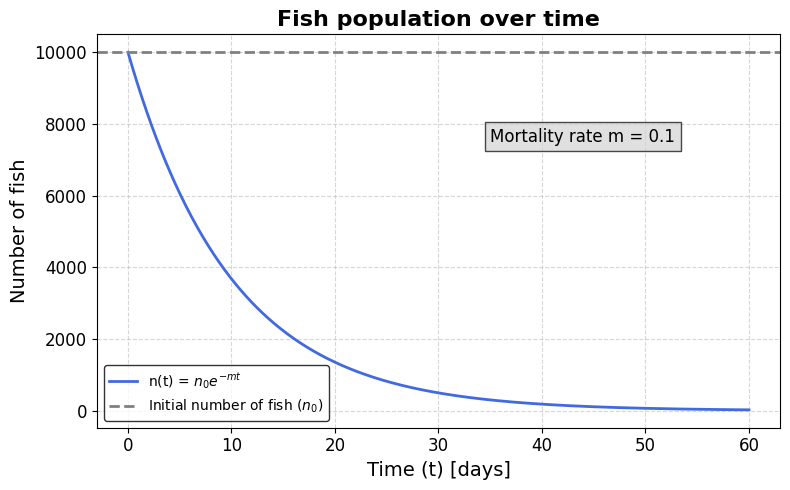

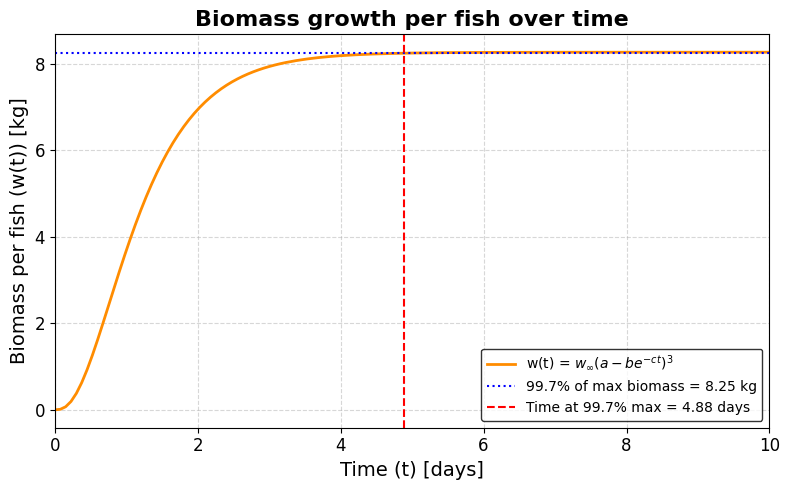

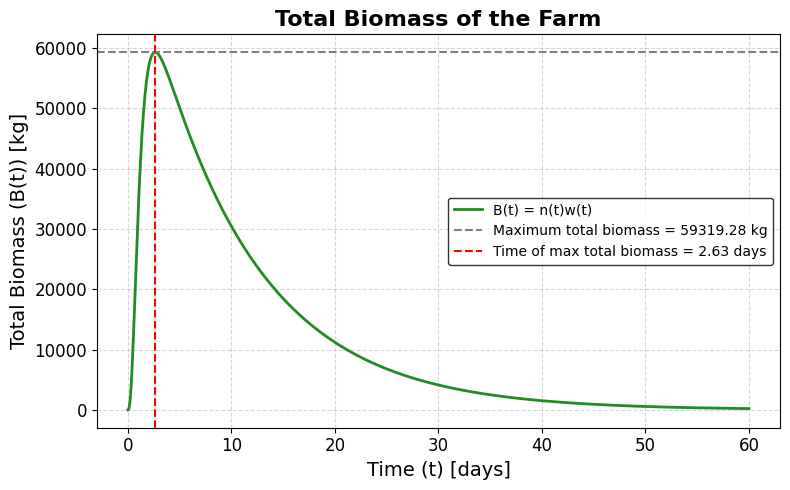

In [33]:
t = np.linspace(0, 60, 800)

n_t = fish_population(t)
w_t = biomass_growth(t)
B_t = total_biomass(t)

#Plot fish population
plt.figure(figsize=(8, 5))
plt.plot(t, n_t, color='royalblue', linewidth=2, label='n(t) = $n_0 e^{-mt}$') 
plt.axhline(y=n0, color='gray', linestyle='--', linewidth=2, label='Initial number of fish ($n_0$)')  
plt.text(35, n0 * 0.75, f'Mortality rate m = {m}', bbox=dict(facecolor='lightgray', alpha=0.7, edgecolor='black'), fontsize=12)  
plt.title('Fish population over time', fontsize=16, fontweight='bold')
plt.xlabel('Time (t) [days]', fontsize=14)
plt.ylabel('Number of fish', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)  
plt.legend(frameon=True, edgecolor='black')  
plt.tick_params(labelsize=12) 
plt.tight_layout()
plt.savefig("FishPopulation.pdf")
plt.show()
#--------------------------------------------------------------------------------

#Time when Biomass of Salmon reaches 99.7%
max_997 = 0.997 * np.max(w_t)
times_997 = t[w_t >= max_997]
time_997 = times_997[0]

#Plot biomass growth
plt.figure(figsize=(8, 5))
plt.plot(t, w_t, color='darkorange', linewidth=2, label=r'w(t) = $w_{\infty}(a - be^{-ct})^3$')
plt.axhline(y=max_997, color='blue', linestyle=':', label=f'99.7% of max biomass = {max_997:.2f} kg')
plt.axvline(x=time_997, color='red', linestyle='--', label=f'Time at 99.7% max = {time_997:.2f} days')
plt.title('Biomass growth per fish over time', fontsize=16, fontweight='bold')
plt.xlabel('Time (t) [days]', fontsize=14)
plt.ylabel('Biomass per fish (w(t)) [kg]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, edgecolor='black')
plt.xlim(0,10)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()
#-----------------------------------------------------------------------------

#Maximum total biomass and time
max_B = max(B_t)
max_index_B = np.argmax(B_t)
max_time_B = t[max_index_B]

#Plot total biomass
plt.figure(figsize=(8, 5))
plt.plot(t, B_t, color='forestgreen', linewidth=2, label='B(t) = n(t)w(t)')
plt.axhline(y=max_B, color='grey', linestyle='--', label=f'Maximum total biomass = {max_B:.2f} kg')
plt.axvline(x=max_time_B, color='red', linestyle='--', label=f'Time of max total biomass = {max_time_B:.2f} days')
plt.title('Total Biomass of the Farm', fontsize=16, fontweight='bold')
plt.xlabel('Time (t) [days]', fontsize=14)
plt.ylabel('Total Biomass (B(t)) [kg]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, edgecolor='black')
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()